In [ ]:
import numpy as np
import torch as tc
from torch import nn
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
from torch import optim
import torch.nn.functional as F

In [ ]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

dataset = datasets.FashionMNIST(root = "./data",
						train = True,
						download = True,
						transform = tensor_transform)

loader = tc.utils.data.DataLoader(dataset = dataset,
									batch_size = 32,
									shuffle = True, num_workers = 3)


100%|██████████| 26421880/26421880 [00:02<00:00, 11830179.71it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200436.32it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3739051.57it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18329606.95it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([32, 1, 28, 28])
tensor([0, 8, 3, 2, 0, 7, 2, 2, 7, 2, 8, 2, 1, 3, 6, 5, 8, 6, 7, 3, 5, 4, 0, 0,
        9, 0, 2, 0, 4, 9, 3, 4])


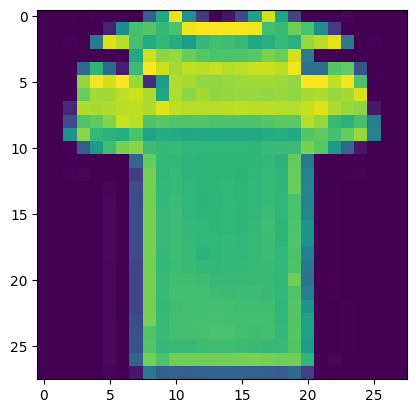

In [ ]:
for data in loader:

  plt.imshow(data[0][0].reshape((28, 28)))
  print(data[0].shape)
  print(data[1])
  break

In [ ]:
from model import *

model_linear = Model_Linear().cuda()

In [ ]:
#Loss function
CRITERION = nn.MSELoss()

#Hyperparameters
EPOCHS = 20
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-8

# Optimizers
OPTIMIZER = optim.Adam(model_linear.parameters(), lr=LEARNING_RATE,  weight_decay = WEIGHT_DECAY)


In [ ]:
from tqdm import tqdm

conv_losses = []
conv_output = []

for epoch in range(EPOCHS):
    loss_full = 0
    for img, label in tqdm(loader):
        # img = img.reshape(-1, 1, 64, 64)

        # Forward pass
        img = img.to(tc.float32)
        img = img.cuda()

        outputs = model_linear(img)

        # print(img.shape, outputs.shape, decoded.shape)
        loss = CRITERION(outputs, img.reshape((32, 28*28)))

        # Backward pass and optimization
        OPTIMIZER.zero_grad()
        loss.backward()
        OPTIMIZER.step()

        loss_full += loss.item()

    loss_full = loss_full/len(loader)
    conv_losses.append(loss_full)

    print(f'Epoch: {epoch + 1}, Loss: {loss_full:.7f}')
    conv_output.append((epoch, img, outputs))


  0%|          | 0/1875 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 1875/1875 [00:13<00:00, 139.14it/s]


Epoch: 1, Loss: 0.0187486


100%|██████████| 1875/1875 [00:13<00:00, 136.11it/s]


Epoch: 2, Loss: 0.0139070


100%|██████████| 1875/1875 [00:15<00:00, 122.83it/s]


Epoch: 3, Loss: 0.0128818


100%|██████████| 1875/1875 [00:13<00:00, 138.75it/s]


Epoch: 4, Loss: 0.0122406


100%|██████████| 1875/1875 [00:13<00:00, 135.89it/s]


Epoch: 5, Loss: 0.0117860


100%|██████████| 1875/1875 [00:13<00:00, 136.73it/s]


Epoch: 6, Loss: 0.0113649


100%|██████████| 1875/1875 [00:13<00:00, 137.75it/s]


Epoch: 7, Loss: 0.0110703


100%|██████████| 1875/1875 [00:13<00:00, 138.81it/s]


Epoch: 8, Loss: 0.0108085


100%|██████████| 1875/1875 [00:13<00:00, 135.79it/s]


Epoch: 9, Loss: 0.0105674


100%|██████████| 1875/1875 [00:13<00:00, 136.66it/s]


Epoch: 10, Loss: 0.0103270


100%|██████████| 1875/1875 [00:15<00:00, 118.16it/s]


Epoch: 11, Loss: 0.0101989


100%|██████████| 1875/1875 [00:13<00:00, 136.51it/s]


Epoch: 12, Loss: 0.0100521


100%|██████████| 1875/1875 [00:14<00:00, 131.70it/s]


Epoch: 13, Loss: 0.0099338


100%|██████████| 1875/1875 [00:14<00:00, 133.90it/s]


Epoch: 14, Loss: 0.0098122


100%|██████████| 1875/1875 [00:13<00:00, 136.42it/s]


Epoch: 15, Loss: 0.0097602


100%|██████████| 1875/1875 [00:13<00:00, 137.44it/s]


Epoch: 16, Loss: 0.0096209


100%|██████████| 1875/1875 [00:13<00:00, 137.91it/s]


Epoch: 17, Loss: 0.0095408


100%|██████████| 1875/1875 [00:13<00:00, 137.91it/s]


Epoch: 18, Loss: 0.0094703


100%|██████████| 1875/1875 [00:13<00:00, 137.91it/s]


Epoch: 19, Loss: 0.0094416


100%|██████████| 1875/1875 [00:13<00:00, 137.95it/s]

Epoch: 20, Loss: 0.0093635
